# Lecture 4: Linear regression, optimization, and symbolic mathematics 

## Function approximation

### Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x): # DGP (data generating process)
    return np.sin(x)+0.5*x

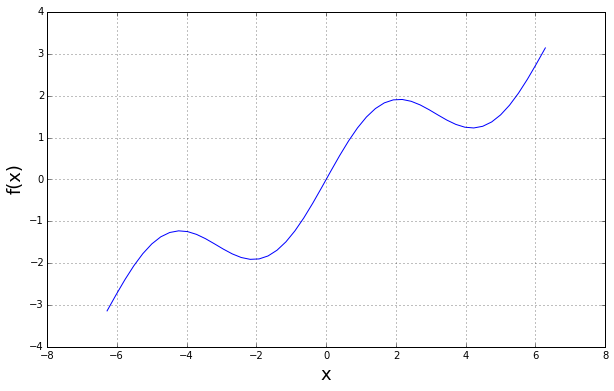

In [5]:
x=np.linspace(-2*np.pi, 2*np.pi, 50) # space for x-axis

# Plot the function
plt.figure(figsize=(10,6))
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x', fontsize=18)
plt.ylabel('f(x)', fontsize=18)

Given $N$ points $\left(x_j, y_j\right)$, you choose $K$ base functions $b_i\left(x_j\right)$ such that $y_j$ can be written as a linear combination of such functions. Then one optimizes the coefficients:
$$ \min_{\alpha_i} \frac{1}{N} \sum_{j=1}^N \left(y_j-\sum_{i=1}^K \alpha_i b_i\left(x_j\right)\right)^2 $$

#### Polynomials

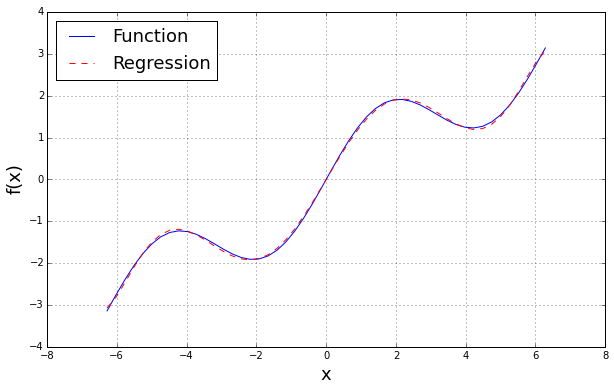

In [17]:
deg=8 # polynomial degree

reg=np.polyfit(x, f(x), deg)
y_fit=np.polyval(reg,x)

plt.figure(figsize=(10,6))
plt.plot(x, f(x), 'b', label='Function')
plt.plot(x, y_fit, 'r', ls='--', label='Regression')
plt.legend(loc='best', fontsize=18)
plt.grid(True)
plt.xlabel('x', fontsize=18)
plt.ylabel('f(x)', fontsize=18)

In [19]:
# Root mean squared error
np.sqrt(np.mean((f(x)-y_fit)**2))

0.042153451530708271

#### Beyond polynomials

In [20]:
# Choose basis functions
matrix=np.zeros((len(x),5))
matrix[:,0]=1
matrix[:,1]=x
matrix[:,2]=x**2
matrix[:,3]=np.sin(x)
matrix[:,4]=np.cos(x)

In [21]:
reg=np.linalg.lstsq(matrix, f(x))[0] # compute the coefficients
y_fit2=np.dot(reg, matrix.T) # compute the fitted values

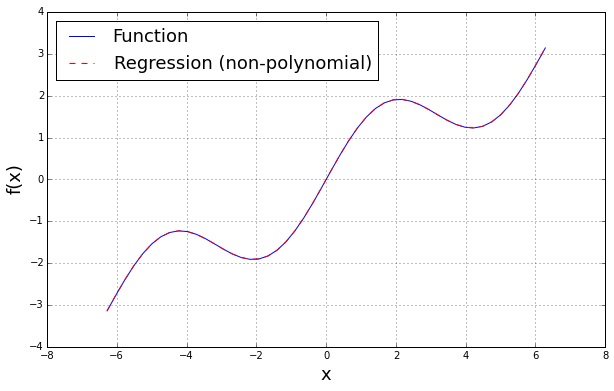

In [22]:
plt.figure(figsize=(10,6))
plt.plot(x, f(x), 'b', label='Function')
plt.plot(x, y_fit2, 'r', ls='--', label='Regression (non-polynomial)')
plt.legend(loc='best', fontsize=18)
plt.grid(True)
plt.xlabel('x', fontsize=18)
plt.ylabel('f(x)', fontsize=18)

In [23]:
# Root mean squared error
np.sqrt(np.mean((f(x)-y_fit2)**2))

2.5169823561928355e-15

### Interpolation

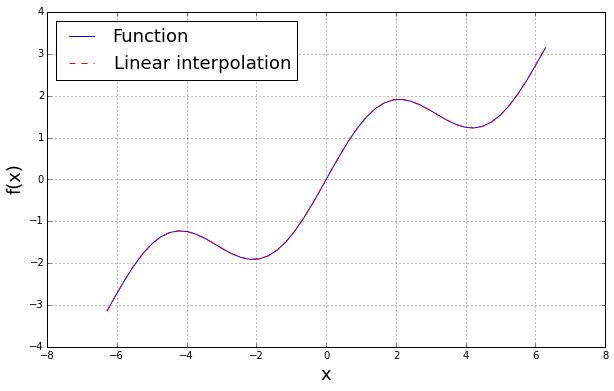

In [31]:
import scipy.interpolate as spi
ipo=spi.splrep(x,f(x), k=1)
y_interp=spi.splev(x,ipo)

plt.figure(figsize=(10,6))
plt.plot(x, f(x), 'b', label='Function')
plt.plot(x, y_interp, 'r', ls='--', label='Linear interpolation')
plt.legend(loc='best', fontsize=18)
plt.grid(True)
plt.xlabel('x', fontsize=18)
plt.ylabel('f(x)', fontsize=18)

In [34]:
#ipo # what object is this?

## Convex optimization

In [38]:
def fm((x,y)):
    z=np.sin(x)+1/20.0*x**2+np.sin(y)+1/20.0*y**2
    # print "%8.4f %8.4f %8.4f" % (x,y,z)
    return z

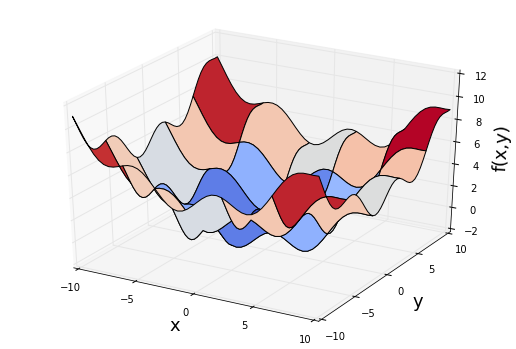

In [40]:
# Plot the function
x=np.linspace(-10,10,50)
y=np.linspace(-10,10,50)

X,Y=np.meshgrid(x,y)

Z=fm((X,Y))

from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig=plt.figure(figsize=(9,6))
ax=fig.gca(projection='3d')

surf=ax.plot_surface(X,Y,Z,cmap=mpl.cm.coolwarm)
ax.set_xlabel('x',fontsize=18)
ax.set_ylabel('y',fontsize=18)
ax.set_zlabel('f(x,y)',fontsize=18)

### Brute force optimization

In [41]:
import scipy.optimize as spo
search_area=(-10,10.01,0.1)

def fm1((x,y)):
    z=np.sin(x)+1/20.0*x**2+np.sin(y)+1/20.0*y**2
    print "%8.4f %8.4f %8.4f" % (x,y,z)
    return z

min_1=spo.brute(fm1, (search_area,search_area), finish=None)

-10.0000 -10.0000  11.0880
-10.0000 -10.0000  11.0880
-10.0000  -9.9000  10.9021
-10.0000  -9.8000  10.7125
-10.0000  -9.7000  10.5203
-10.0000  -9.6000  10.3263
-10.0000  -9.5000  10.1317
-10.0000  -9.4000   9.9372
-10.0000  -9.3000   9.7441
-10.0000  -9.2000   9.5531
-10.0000  -9.1000   9.3654
-10.0000  -9.0000   9.1819
-10.0000  -8.9000   9.0035
-10.0000  -8.8000   8.8311
-10.0000  -8.7000   8.6656
-10.0000  -8.6000   8.5076
-10.0000  -8.5000   8.3580
-10.0000  -8.4000   8.2174
-10.0000  -8.3000   8.0863
-10.0000  -8.2000   7.9653
-10.0000  -8.1000   7.8546
-10.0000  -8.0000   7.7547
-10.0000  -7.9000   7.6656
-10.0000  -7.8000   7.5875
-10.0000  -7.7000   7.5204
-10.0000  -7.6000   7.4641
-10.0000  -7.5000   7.4185
-10.0000  -7.4000   7.3833
-10.0000  -7.3000   7.3581
-10.0000  -7.2000   7.3424
-10.0000  -7.1000   7.3356
-10.0000  -7.0000   7.3370
-10.0000  -6.9000   7.3461
-10.0000  -6.8000   7.3619
-10.0000  -6.7000   7.3837
-10.0000  -6.6000   7.4105
-10.0000  -6.5000   7.4414
-

In [42]:
min_1

array([-1.4, -1.4])

### Optimization with *fmin*

In [43]:
min_2=spo.fmin(fm, min_1, xtol=0.001, ftol=0.001)
min_2

Optimization terminated successfully.
         Current function value: -1.775726
         Iterations: 16
         Function evaluations: 32


array([-1.42743423, -1.42786531])

In [46]:
# Sensitivity to starting values
min_2=spo.fmin(fm, [2,2], xtol=0.001, ftol=0.001)
min_2

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 37
         Function evaluations: 70


array([ 4.27113587,  4.27123862])

### Constrained optimization

In [47]:
def ExpU((s,b)):
    return -(0.5*np.sqrt(s*15+b*5)+0.5*np.sqrt(s*5+b*12))

cons=({'type':'ineq', 'fun': lambda (s,b): 100-s*10-b*10})

result=spo.minimize(ExpU, [5,5], method='SLSQP', constraints=cons)
result

  status: 0
 success: True
    njev: 5
    nfev: 21
     fun: -9.7008836114878321
       x: array([ 8.02547122,  1.97452878])
 message: 'Optimization terminated successfully.'
     jac: array([-0.48508096, -0.48489535,  0.        ])
     nit: 5

### Numerical integration

In [53]:
import scipy.integrate as integr
lmin=0
lmax=1

# fixed and adaptive quadrature (no significant difference)
integr.fixed_quad(f,lmin,lmax)[0], integr.quad(f,lmin,lmax)[0]

(0.70969769413204853, 0.7096976941318602)

## Symbolic mathematics

In [54]:
import sympy as sy

x=sy.Symbol('x')
y=sy.Symbol('y')

### Simplify functions

In [56]:
f=x**2+3+0.5*x**2+3/2
sy.simplify(f)

1.5*x**2 + 4

### Solving equations

In [64]:
sy.solve(x**2-4), sy.solve(x**2-y**2), sy.solve(x**3+3*x**2+3*x+1), sy.solve({x-y-1,x+y-2})

([-2, 2], [{x: -y}, {x: y}], [-1], {x: 3/2, y: 1/2})

### Symbolic integration

In [65]:
sy.integrate(sy.log(x)+sy.sin(x))

x*log(x) - x - cos(x)

### Symbolic differentiation

In [66]:
f=x**3+x-sy.exp(y)
sy.diff(f,x), sy.diff(f,y)

(3*x**2 + 1, -exp(y))

### Solve a first order condition

In [68]:
x_zero=sy.solve(sy.diff(f,x))
x_zero

[-sqrt(3)*I/3, sqrt(3)*I/3]

### Numerically evaluate symbolic functions

In [69]:
f.subs({x:2,y:0}).evalf()

9.00000000000000

## Application (lab exercise)

Optimize the function
$$ g\left(x\right)=\frac{x^2}{2}+x\left(y-1\right)+y $$
both numerically and solving the first order conditions in *sympy*.